# Final assignemt - Statistics
## Reanana Duvdevani and Hila monsonego

### imports

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import scikit_posthocs as sp
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Load the data

In [7]:
df = pd.read_csv('C:/Users/User/Desktop/עבודות/עבודות של הילה/תיאוריה סטטיסטית/GaltonFamilies.csv')

In [8]:
df.head()

rownames family  father  mother  midparentHeight  children  childNum  \
0         1    001    78.5    67.0            75.43         4         1   
1         2    001    78.5    67.0            75.43         4         2   
2         3    001    78.5    67.0            75.43         4         3   
3         4    001    78.5    67.0            75.43         4         4   
4         5    002    75.5    66.5            73.66         4         1   

   gender  childHeight  
0    male         73.2  
1  female         69.2  
2  female         69.0  
3  female         69.0  
4    male         73.5

### Data frame of the families representatives

In [10]:
representatives_df=df[df["childNum"]==1]

### Check data distributions

In [12]:
def check_normality(data, threshold=30):
    """
    Perform a normality test using the Shapiro-Wilk test for small samples
    and the Kolmogorov-Smirnov test for larger samples.

    Parameters:
    data (list or array-like): The sample data to test for normality.
    threshold (int): The sample size threshold to switch between tests. Default is 30.

    Returns:
    test_name (str): The name of the test performed.
    statistic (float): The test statistic.
    p_value (float): The p-value of the test.
    """

    n = len(data)

    if n <= threshold:
        test_name = "Shapiro-Wilk"
        statistic, p_value = stats.shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        statistic, p_value = stats.kstest(
            data, 'norm', args=(np.mean(data), np.std(data)))

    print("p value:%.4f" % p_value)
    if p_value < 0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

### Number of children in family

In [14]:
sns.histplot(df,
               x = "children",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"]))

p value:0.0004
Reject null hypothesis >> The data is not normally distributed


### Children height

p value:0.0004
Reject null hypothesis >> The data is not normally distributed


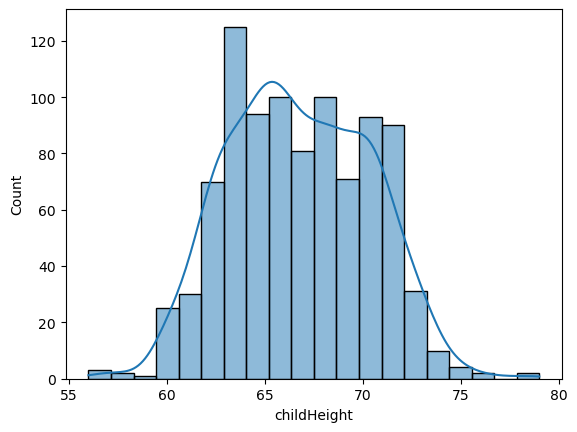

In [16]:
sns.histplot(df,
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"]))

### Boys (children) height

p value:0.0013
Reject null hypothesis >> The data is not normally distributed


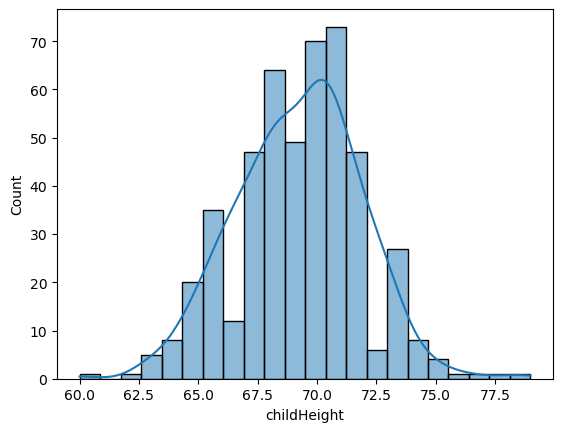

In [18]:
sns.histplot(df[df["gender"]=="male"],
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"])[np.where(np.array(df["gender"])=="male")])

### Girls (children) height

In [20]:
sns.histplot(df[df["gender"]=="female"],
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"])[np.where(np.array(df["gender"])=="female")])

p value:0.0718
Fail to reject null hypothesis >> The data is normally distributed


### Fathers height

p value:0.0995
Fail to reject null hypothesis >> The data is normally distributed


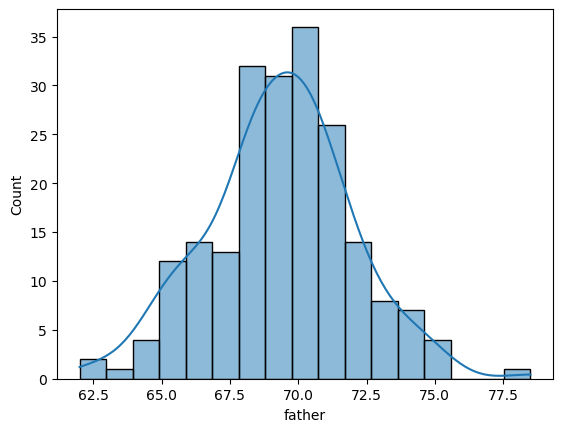

In [22]:
sns.histplot(representatives_df,
               x = "father",
               stat = 'count',
               kde = True)
check_normality(np.array(representatives_df["father"]))

### Mothers height

p value:0.1001
Fail to reject null hypothesis >> The data is normally distributed


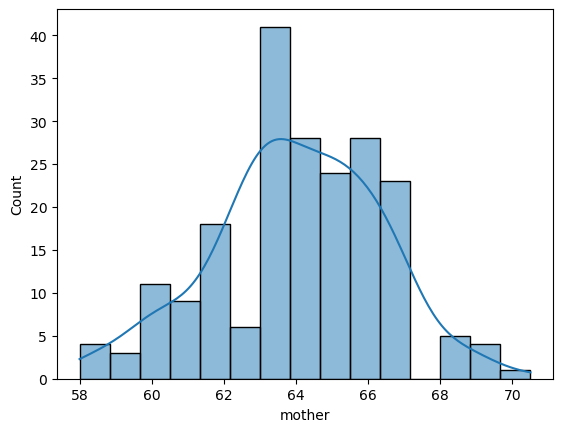

In [24]:
sns.histplot(representatives_df,
               x = "mother",
               stat = 'count',
               kde = True)
check_normality(np.array(representatives_df["mother"]))

### Galton MidParent height

p value:0.8319
Fail to reject null hypothesis >> The data is normally distributed


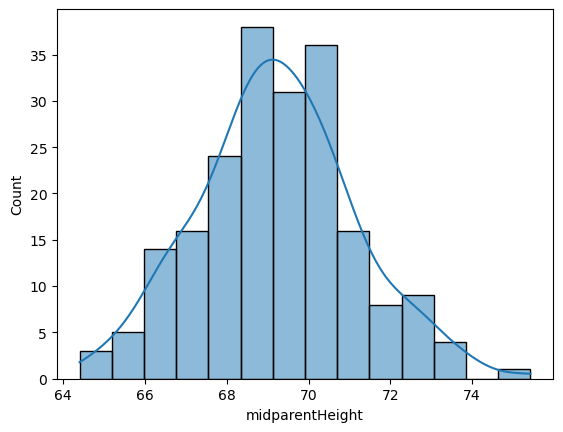

In [26]:
sns.histplot(representatives_df,
               x = "midparentHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(representatives_df["midparentHeight"]))

### Pearson corelations matrix for the numerical variables

In [28]:
numerical_df=df[["father","mother","midparentHeight","childHeight"]]

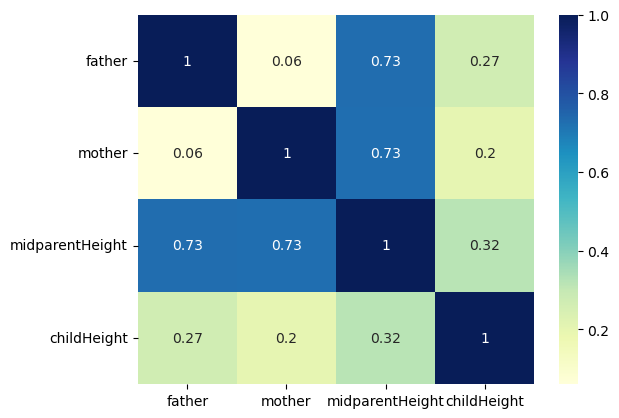

In [29]:
dataplot = sns.heatmap(numerical_df.corr(), cmap="YlGnBu", annot=True) 

#### p_values calculation

In [31]:
corr_coefficient, p_value = stats.pearsonr(np.array(numerical_df["childHeight"]),np.array(numerical_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(numerical_df["childHeight"]),np.array(numerical_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(numerical_df["childHeight"]),np.array(numerical_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.26603853892271967 --> with p_value:  1.3498077148869741e-16
child height and mother height correlation:  0.20132194862209996 --> with p_value:  5.362412018228277e-10
child height and midparent height correlation:  0.3209498960639596 --> with p_value:  8.05386499247872e-24


### Spearman correlations matrix for the categorial variables

In [33]:
categorial_df=df[["gender","childHeight"]]

In [34]:
for i in range(categorial_df.shape[0]):
    if categorial_df["gender"].iloc[i] == "male":
        categorial_df["gender"].iloc[i] = 1
    else:
        categorial_df["gender"].iloc[i] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_15552\4082820120.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  categorial_df["gender"].iloc[i] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_15552\4082820120.py:3: SettingWithCopyWarning: 
A 

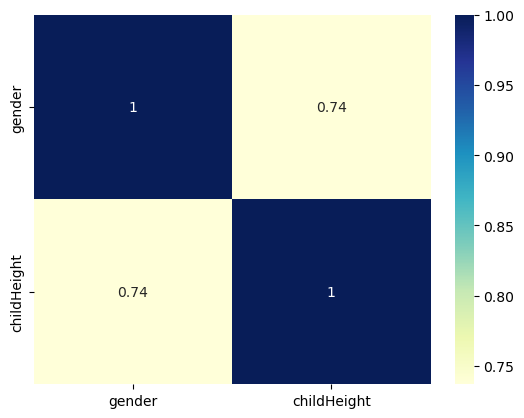

In [35]:
dataplot = sns.heatmap(categorial_df.corr("spearman"), cmap="YlGnBu", annot=True) 

#### p_value calculation

In [37]:
corr_coefficient, p_value = stats.spearmanr(np.array(categorial_df["childHeight"]),np.array(categorial_df["gender"] ))
print("child height and gender correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and gender correlation:  0.7370167452367875 --> with p_value:  9.64733265650843e-161


### Pearson matrix for the girls (children)

In [39]:
girls_df=df[df["gender"]=="female"]

In [40]:
girls_numerical_df=girls_df[["father","mother","midparentHeight","childHeight"]]

In [41]:
dataplot = sns.heatmap(girls_numerical_df.corr(), cmap="YlGnBu", annot=True) 

In [42]:
corr_coefficient, p_value = stats.pearsonr(np.array(girls_numerical_df["childHeight"]),np.array(girls_numerical_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(girls_numerical_df["childHeight"]),np.array(girls_numerical_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(girls_numerical_df["childHeight"]),np.array(girls_numerical_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.42843297684634896 --> with p_value:  1.1970408643547386e-21
child height and mother height correlation:  0.3051644513268953 --> with p_value:  3.2218315248985794e-11
child height and midparent height correlation:  0.51327251718791 --> with p_value:  8.23952706205857e-32


### Pearson matrix for the boys

In [44]:
boys_df=df[df["gender"]=="male"]

In [45]:
boys_numerical_df=boys_df[["father","mother","midparentHeight","childHeight"]]

In [46]:
dataplot = sns.heatmap(boys_numerical_df.corr(), cmap="YlGnBu", annot=True) 

In [47]:
corr_coefficient, p_value = stats.pearsonr(np.array(boys_numerical_df["childHeight"]),np.array(boys_numerical_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(boys_numerical_df["childHeight"]),np.array(boys_numerical_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(boys_numerical_df["childHeight"]),np.array(boys_numerical_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.3923834966628357 --> with p_value:  3.737108856194152e-19
child height and mother height correlation:  0.3230049836849058 --> with p_value:  3.837934605721925e-13
child height and midparent height correlation:  0.48275279903014195 --> with p_value:  1.8904769740291211e-29


### Pedict the average of children height

In [49]:
# correct df
correct_df=df
for i in range(0,609):
    correct_df["family"].iloc[i]=int(correct_df["family"].iloc[i])
for i in range(609,617):
    if correct_df["family"].iloc[i] == "136A":
        correct_df["family"].iloc[i]=136
for i in range(617,934):
    correct_df["family"].iloc[i]=int(correct_df["family"].iloc[i])+1 
    
df=correct_df

C:\Users\User\AppData\Local\Temp\ipykernel_15552\4011132177.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  correct_df["family"].iloc[i]=int(correct_df["family"].iloc[i])
C:\Users\User\AppData\Local\Temp\ipykernel_15552\4011132177.py:4: 

In [50]:
averages_df=[]
boys_average=0
boys_counter=0
girls_average=0
girls_counter=0
family_num=1
for i in range(correct_df.shape[0]):
    if correct_df["family"].iloc[i] == family_num:
        if correct_df["gender"].iloc[i]=="male":
            boys_average+=correct_df["childHeight"].iloc[i]
            boys_counter+=1
        else:
            girls_average+=correct_df["childHeight"].iloc[i]
            girls_counter+=1
    else:
        if boys_counter>0:
            boys_average=boys_average/boys_counter
            new_row=[correct_df["family"].iloc[i-1], correct_df["father"].iloc[i-1], correct_df["mother"].iloc[i-1],
                     correct_df["midparentHeight"].iloc[i-1],1,boys_average]
            averages_df.append(new_row)
        if girls_counter>0:    
            girls_average=girls_average/girls_counter
            new_row=[correct_df["family"].iloc[i-1], correct_df["father"].iloc[i-1], correct_df["mother"].iloc[i-1],
                     correct_df["midparentHeight"].iloc[i-1],0,girls_average]
            averages_df.append(new_row)  
        family_num+=1    
        boys_average=0
        boys_counter=0
        girls_average=0
        girls_counter=0
        if correct_df["gender"].iloc[i]=="male":
            boys_average+=correct_df["childHeight"].iloc[i]
            boys_counter+=1
        else:
            girls_average+=correct_df["childHeight"].iloc[i]
            girls_counter+=1

if boys_counter>0:
    boys_average=boys_average/boys_counter
    new_row=[correct_df["family"].iloc[i-1], correct_df["father"].iloc[i-1], correct_df["mother"].iloc[i-1],
             correct_df["midparentHeight"].iloc[i-1],1,boys_average]
    averages_df.append(new_row)
if girls_counter>0:    
    girls_average=girls_average/girls_counter
    new_row=[correct_df["family"].iloc[i-1], correct_df["father"].iloc[i-1], correct_df["mother"].iloc[i-1],
            correct_df["midparentHeight"].iloc[i-1],0,girls_average]
    averages_df.append(new_row)  

In [51]:
averages_df

[[1, 78.5, 67.0, 75.43, 1, 73.2],
 [1, 78.5, 67.0, 75.43, 0, 69.06666666666666],
 [2, 75.5, 66.5, 73.66, 1, 73.0],
 [2, 75.5, 66.5, 73.66, 0, 65.5],
 [3, 75.0, 64.0, 72.06, 1, 71.0],
 [3, 75.0, 64.0, 72.06, 0, 68.0],
 [4, 75.0, 64.0, 72.06, 1, 69.5],
 [4, 75.0, 64.0, 72.06, 0, 64.83333333333333],
 [5, 75.0, 58.5, 69.09, 1, 69.66666666666667],
 [5, 75.0, 58.5, 69.09, 0, 63.833333333333336],
 [6, 74.0, 68.0, 73.72, 0, 69.5],
 [7, 74.0, 68.0, 73.72, 1, 74.125],
 [7, 74.0, 68.0, 73.72, 0, 67.25],
 [8, 74.0, 66.5, 72.91, 0, 68.16666666666667],
 [9, 74.5, 66.0, 72.89, 0, 66.0],
 [10, 74.0, 65.5, 72.37, 0, 65.5],
 [11, 74.0, 62.0, 70.48, 1, 72.0],
 [11, 74.0, 62.0, 70.48, 0, 65.75],
 [12, 74.0, 61.0, 69.94, 0, 65.0],
 [13, 73.0, 67.0, 72.68, 1, 71.0],
 [13, 73.0, 67.0, 72.68, 0, 62.0],
 [14, 73.0, 67.0, 72.68, 1, 67.5],
 [15, 73.0, 66.5, 72.41, 1, 70.75],
 [15, 73.0, 66.5, 72.41, 0, 66.7],
 [16, 73.0, 65.0, 71.6, 1, 70.41999999999999],
 [16, 73.0, 65.0, 71.6, 0, 65.8],
 [17, 73.0, 64.5, 71.33

In [52]:
averages_df=np.array(averages_df)

In [53]:
np.shape(averages_df)

(355, 6)

In [54]:
X=np.concatenate((averages_df[:,1:3],averages_df[:,4:5]),axis=1)
x1=X[:,0]
min_x1=min(x1)
max_x1=max(x1)
X[:,0]=(x1-min_x1)/(max_x1-min_x1)
x2=X[:,1]
min_x2=min(x2)
max_x2=max(x2)
X[:,1]=(x2-min_x2)/(max_x2-min_x2)
X

array([[1.        , 0.72      , 1.        ],
       [1.        , 0.72      , 0.        ],
       [0.81818182, 0.68      , 1.        ],
       ...,
       [0.        , 0.64      , 0.        ],
       [0.03030303, 0.4       , 1.        ],
       [0.03030303, 0.4       , 0.        ]])

In [55]:
Y=averages_df[:,5]
min_y=min(Y)
max_y=max(Y)
Y=(Y-min_y)/(max_y-min_y)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.3542 - val_loss: 1.3757
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2725 - val_loss: 1.3327
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2241 - val_loss: 1.2904
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2343 - val_loss: 1.2494
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1253 - val_loss: 1.2097
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0310 - val_loss: 1.1712
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0430 - val_loss: 1.1332
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0617 - val_loss: 1.0965
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0088 - val_loss: 1.0608
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9815 - val_loss: 1.0266
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9235 - val_loss: 0.9932
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9562 - val_loss: 0.9608


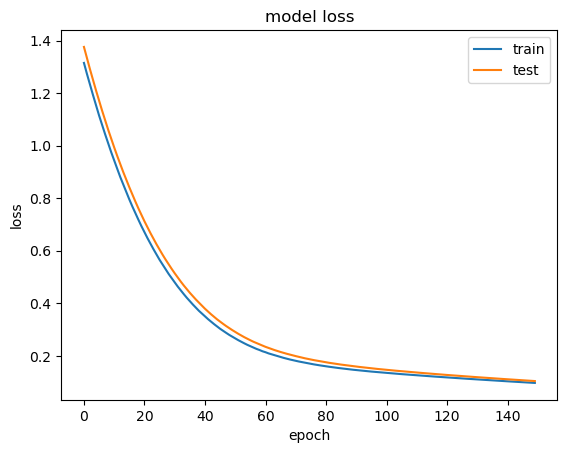

In [57]:
model = tf.keras.Sequential([
    keras.Input(shape=(3,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=150, validation_data=(X_test,Y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


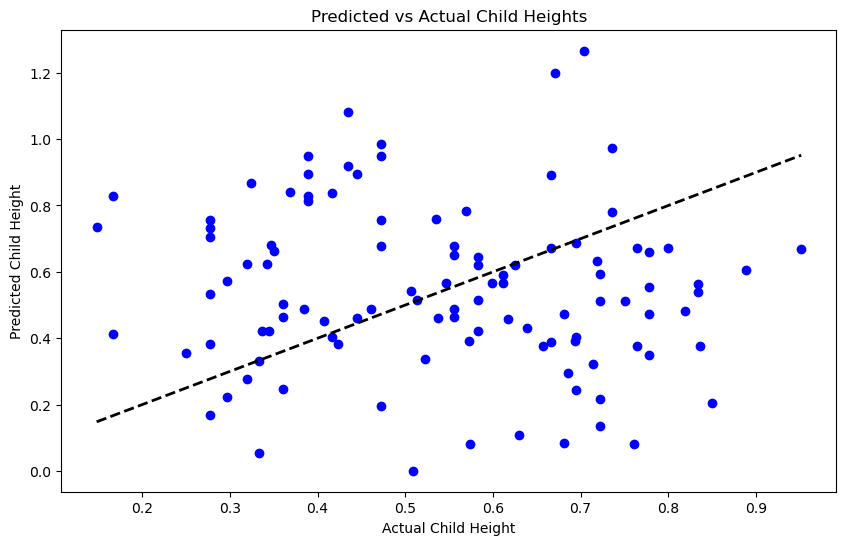

In [58]:
# Plot the predicted vs actual child heights
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [59]:
model.get_weights()

[array([[ 1.326184 ],
        [-0.6790131],
        [-0.1126512]], dtype=float32),
 array([0.36124295], dtype=float32)]

### Predict children height

In [60]:
families=df[["gender","midparentHeight","childHeight"]]

In [61]:
for i in range(families.shape[0]):
    if families["gender"].iloc[i] == "male":
        families["gender"].iloc[i] = 1
    else:
        families["gender"].iloc[i] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_15552\2884774089.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  families["gender"].iloc[i] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_15552\2884774089.py:3: SettingWithCopyWarning: 
A value

In [62]:
families=np.array(families)

In [63]:
X=families[:,0:2]
x1=X[:,1]
min_x1=min(x1)
max_x1=max(x1)
X[:,1]=(x1-min_x1)/(max_x1-min_x1)
X

array([[1, 1.0],
       [0, 1.0],
       [0, 1.0],
       ...,
       [0, 0.2030825022665453],
       [1, 0.07887579329102488],
       [0, 0.07887579329102488]], dtype=object)

In [64]:
Y=families[:,2]
min_y=min(Y)
max_y=max(Y)
Y=(Y-min_y)/(max_y-min_y)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0664 - val_loss: 0.0614
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0638 - val_loss: 0.0567
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0628 - val_loss: 0.0524
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0545 - val_loss: 0.0483
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0472 - val_loss: 0.0447
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0451 - val_loss: 0.0412
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0419 - val_loss: 0.0380
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0392 - val_loss: 0.0351
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0357 - val_loss: 0.0323
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0340 - val_loss: 0.0298
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294 - val_loss: 0.0275
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

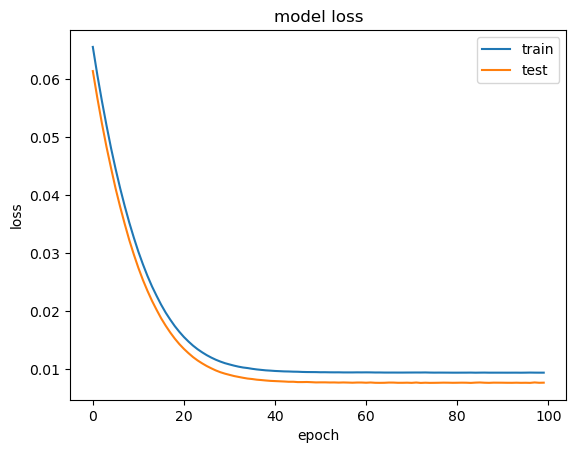

In [66]:
model = tf.keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [67]:
# Plot the predicted vs actual child heights
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [68]:
# mom ad dad

In [69]:
families=df[["gender","father","mother","childHeight"]]

In [70]:
for i in range(families.shape[0]):
    if families["gender"].iloc[i] == "male":
        families["gender"].iloc[i] = 1
    else:
        families["gender"].iloc[i] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_15552\2884774089.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  families["gender"].iloc[i] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_15552\2884774089.py:3: SettingWithCopyWarning: 
A value

In [71]:
families=np.array(families)

In [72]:
X=families[:,0:3]
x1=X[:,1]
min_x1=min(x1)
max_x1=max(x1)
X[:,1]=(x1-min_x1)/(max_x1-min_x1)
x2=X[:,2]
min_x2=min(x2)
max_x2=max(x2)
X[:,2]=(x2-min_x2)/(max_x2-min_x2)

X


array([[1, 1.0, 0.72],
       [0, 1.0, 0.72],
       [0, 1.0, 0.72],
       ...,
       [0, 0.0, 0.64],
       [1, 0.030303030303030304, 0.4],
       [0, 0.030303030303030304, 0.4]], dtype=object)

In [73]:
Y=families[:,3]
min_y=min(Y)
max_y=max(Y)
Y=(Y-min_y)/(max_y-min_y)


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8523 - val_loss: 0.7421
Epoch 2/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7455 - val_loss: 0.6593
Epoch 3/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6579 - val_loss: 0.5831
Epoch 4/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5958 - val_loss: 0.5140
Epoch 5/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5037 - val_loss: 0.4524
Epoch 6/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4640 - val_loss: 0.3958
Epoch 7/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3981 - val_loss: 0.3456
Epoch 8/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3342 - val_loss: 0.3008
Epoch 9/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2837 - val_loss: 0.2612
Epoch 10/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2529 - val_loss: 0.2258
Epoch 11/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2185 - val_loss: 0.1951
Epoch 12/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1923 - val_lo

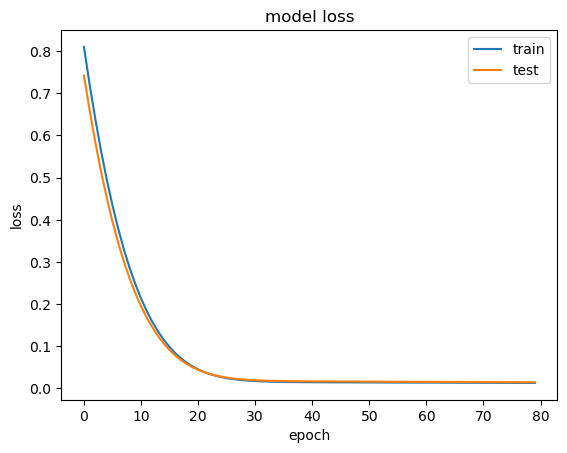

In [75]:
model = tf.keras.Sequential([
    keras.Input(shape=(3,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=80, validation_data=(X_test,Y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [76]:
metric = keras.metrics.R2Score()
metric.update_state(Y_test, Y_test_pred)
result = metric.result()
result

<tf.Tensor: shape=(), dtype=float32, numpy=-0.601045>

In [77]:
# Plot the predicted vs actual child heights
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [78]:
model.get_weights()

[array([[ 0.20414536],
        [-0.17289083],
        [ 0.22323215]], dtype=float32),
 array([0.33327204], dtype=float32)]

In [79]:
metric = keras.metrics.R2Score()
metric.update_state(Y_train, model.predict(X_train))
result = metric.result()
result

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


<tf.Tensor: shape=(), dtype=float32, numpy=0.45853096>

### In families VS all data

#### Global children height distribution

<Axes: xlabel='childHeight', ylabel='Count'>

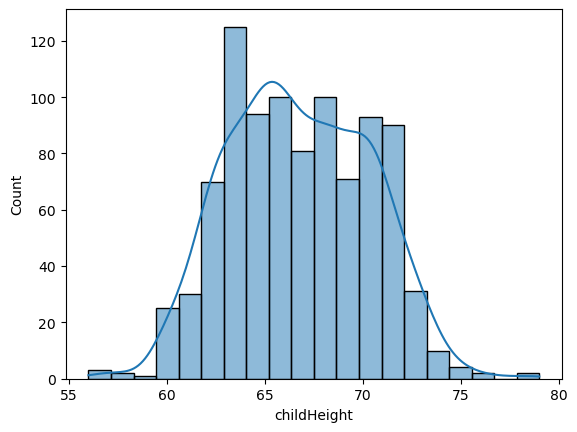

In [185]:
sns.histplot(df,
               x = "childHeight",
               stat = 'count',
               kde = True)

In [82]:
childHeight=np.array(df["childHeight"])

In [83]:
minH=min(childHeight)
maxH=max(childHeight)
meanH=np.mean(childHeight)
stdH=np.std(childHeight)

In [190]:
print("global minimum is: ",minH)
print("global maximum is: ",maxH)
print("global mean is: ",meanH)
print("global std is: ",stdH)
print("global interval is: ",maxH-minH)

global minimum is:  56.0
global maximum is:  79.0
global mean is:  66.74593147751605
global std is:  3.5773346010057634
global interval is:  23.0


#### In families

In [194]:
# mapping to families
families=[]
current_family=[]
family_num=1
for i in range(correct_df.shape[0]):
    if correct_df["family"].iloc[i] == family_num:
        current_family.append(correct_df["childHeight"].iloc[i])
    else:
        families.append(current_family)
        family_num+=1
        current_family=[]
        current_family.append(correct_df["childHeight"].iloc[i])
families.append(current_family)      

In [87]:
families

[[73.2, 69.2, 69.0, 69.0],
 [73.5, 72.5, 65.5, 65.5],
 [71.0, 68.0],
 [70.5, 68.5, 67.0, 64.5, 63.0],
 [72.0, 69.0, 68.0, 66.5, 62.5, 62.5],
 [69.5],
 [76.5, 74.0, 73.0, 73.0, 70.5, 64.0],
 [70.5, 68.0, 66.0],
 [66.0],
 [65.5],
 [74.0, 70.0, 68.0, 67.0, 67.0, 66.0, 63.5, 63.0],
 [65.0],
 [71.0, 62.0],
 [68.0, 67.0],
 [71.0, 70.5, 66.7],
 [72.0, 70.5, 70.2, 70.2, 69.2, 68.7, 66.5, 64.5, 63.5],
 [74.0, 73.0, 71.5, 62.5, 66.5, 62.3],
 [66.0, 64.5, 64.0],
 [62.7],
 [73.2, 73.0, 72.7, 70.0, 69.0, 68.5, 68.0, 66.0],
 [73.0, 68.5, 68.0],
 [73.0, 71.0, 67.0],
 [74.2, 70.5, 69.5, 66.0, 65.5, 65.0, 65.0],
 [65.5],
 [66.0, 63.0],
 [70.5, 70.5, 69.0, 65.0, 63.0],
 [69.0, 67.0, 63.0],
 [73.0, 67.0, 70.5, 70.0, 66.5, 63.0],
 [67.5, 67.2, 66.7],
 [64.0],
 [71.0, 70.0, 70.0, 66.0, 65.0, 65.0],
 [74.0, 72.0, 69.0, 67.5, 63.5],
 [72.0, 71.5, 71.5, 70.0, 68.0],
 [65.7],
 [78.0, 74.0, 73.0, 72.0, 67.0],
 [73.2, 73.0, 69.0, 67.0],
 [70.0, 67.0, 67.0, 66.5],
 [70.0, 69.0, 68.5, 66.0, 64.5, 63.0],
 [71.0, 67

#### Families intervals distribution (calculate: max child - min child, in each family)

In [88]:
intervals=[]
for family in families:
    if max(family)-min(family)>0:
        intervals.append(max(family)-min(family))

In [89]:
min(intervals)

0.7999999999999972

<Axes: ylabel='Count'>

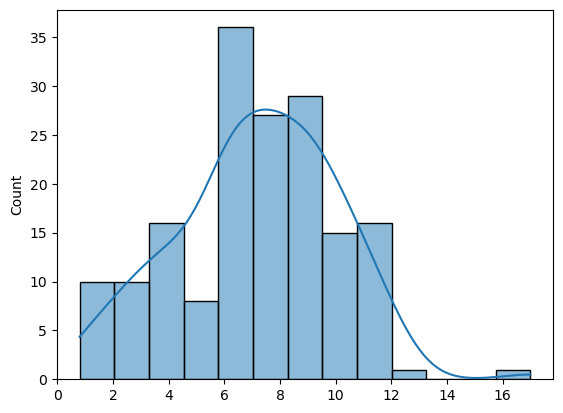

In [90]:
sns.histplot(intervals,stat = 'count', kde = True)

In [91]:
check_normality(intervals)

p value:0.2415
Fail to reject null hypothesis >> The data is normally distributed


#### The std in each family - distriburion through the families

In [176]:
stds=[]
for family in families:
    if len(family)>1:
        stds.append(np.std(family))

<Axes: ylabel='Count'>

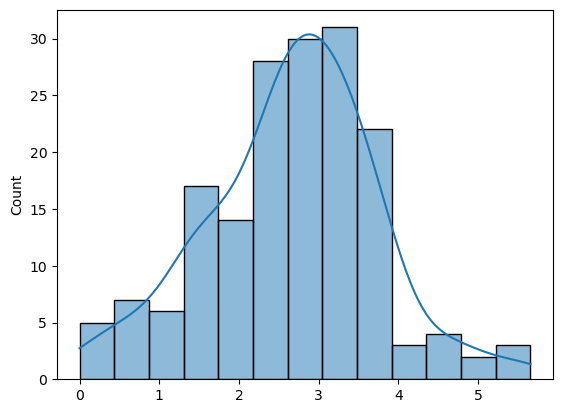

In [178]:
sns.histplot(stds,stat = 'count', kde = True)

In [180]:
check_normality(stds)

p value:0.1565
Fail to reject null hypothesis >> The data is normally distributed


In [ ]:
#### Distribution of the mean heights of th

In [94]:
means=[]
for family in families:
    means.append(np.mean(family))

<Axes: ylabel='Count'>

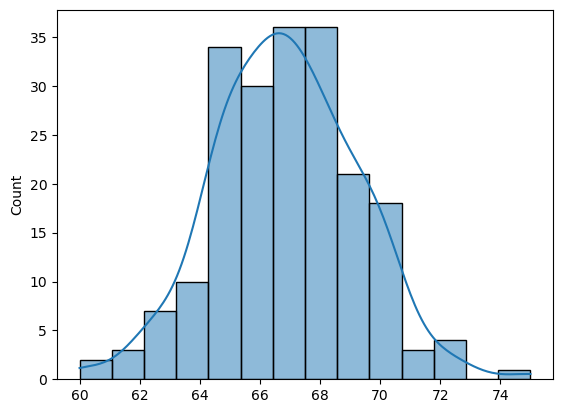

In [95]:
sns.histplot(means,stat = 'count', kde = True)

In [96]:
check_normality(means)

p value:0.8647
Fail to reject null hypothesis >> The data is normally distributed
